In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df1=pd.read_csv("/h1n1_vaccine_prediction.csv")

In [ ]:
df1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:

features = df1[['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']]
labels=df1[['h1n1_vaccine']]

In [ ]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [ ]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [ ]:

features.shape

(26707, 33)

In [ ]:
labels.shape

(26707, 1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.duplicated().sum()

0

In [ ]:
labels.duplicated().sum()

26705

In [ ]:
df1.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [ ]:
df1 = df1.fillna(df1.mean())
df1 = round(df1)


In [ ]:
df1 = df1.fillna('No Category')

In [ ]:
df1.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [ ]:
print("h1n1_worry")
print(df1.h1n1_worry.unique())
##########
print("h1n1_awareness")
print(df1.h1n1_awareness.unique())
#############
print("antiviral_medication")
print(df1.antiviral_medication.unique())
#############
print("contact_avoidance")
print(df1.contact_avoidance.unique())
###########
print("bought_face_mask")
print(df1.bought_face_mask.unique())
#############
print("wash_hands_frequently")
print(df1.wash_hands_frequently.unique())
############
print("avoid_large_gatherings")
print(df1.avoid_large_gatherings.unique())
############
print("reduced_outside_home_cont")
print(df1.reduced_outside_home_cont.unique())
##########3
print("avoid_touch_face")
print(df1.avoid_touch_face.unique())
#############3
print("dr_recc_h1n1_vacc")
print(df1.dr_recc_h1n1_vacc.unique())
#########333
print("dr_recc_seasonal_vacc")
print(df1.dr_recc_seasonal_vacc.unique())
############
print("chronic_medic_condition")
print(df1.chronic_medic_condition.unique())
###########
print("cont_child_undr_6_mnths")
print(df1.cont_child_undr_6_mnths.unique())
#############33
print("is_health_worker")
print(df1.is_health_worker.unique())
##############
print("has_health_insur")
print(df1.has_health_insur.unique())
###############
print("is_h1n1_vacc_effective")
print(df1.is_h1n1_vacc_effective.unique())
################
print("is_h1n1_risky")
print(df1.is_h1n1_risky.unique())
#############
print("sick_from_h1n1_vacc")
print(df1.sick_from_h1n1_vacc.unique())
############
print("is_seas_vacc_effective")
print(df1.is_seas_vacc_effective.unique())
##########
print("is_seas_risky")
print(df1.is_seas_risky.unique())
###########33
print("sick_from_seas_vacc")
print(df1.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [ ]:
# For Datatype = object
#####3
print("age_bracket")
print(df1.age_bracket.unique())
#########3
print("qualification")
print(df1.qualification.unique())
########
print("race")
print(df1.race.unique())
########
print("income_level")
print(df1.income_level.unique())
########
print("marital_status")
print(df1.marital_status.unique())
#######
print("housing_status")
print(df1.housing_status.unique())
#########
print("employment")
print(df1.employment.unique())

#print("hhs_geo_region")
#print(features.hhs_geo_region.unique())
#######3
print("census_msa")
print(df1.census_msa.unique())

#print("employment_industry")
#print(df1.employment_industry.unique())

#print("employment_occupation")
#print(df1.employment_occupation.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [ ]:
enc = LabelEncoder()

In [ ]:
df1.age_bracket = enc.fit_transform(df1.age_bracket)
df1.qualification = enc.fit_transform(df1.qualification)
df1.race = enc.fit_transform(df1.race)
df1.sex = enc.fit_transform(df1.sex)
df1.income_level = enc.fit_transform(df1.income_level)
df1.marital_status = enc.fit_transform(df1.marital_status)
df1.housing_status = enc.fit_transform(df1.housing_status)
df1.employment = enc.fit_transform(df1.employment)
#df1.hhs_geo_region = enc.fit_transform(df1.hhs_geo_region)
df1.census_msa = enc.fit_transform(df1.census_msa)
#df1.employment_industry = enc.fit_transform(df1.employment_industry)
#df1.employment_occupation = enc.fit_transform(df1.employment_occupation)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [ ]:
df1.head(10)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,2,1,2,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,2,2,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,2,1,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,2,2,2,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,1,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,1,0,1,2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,2,1,0,0,0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,0,0,1,0,2,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3,1,1,0,1,0,0,1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3,1,0,2,1,2,0,0.0,0.0,0


In [ ]:
df1.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922,0.212454
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000


In [ ]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers) 

In [ ]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))


1125
1747


In [ ]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [ ]:
findoutliers(df1.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

<Axes: >

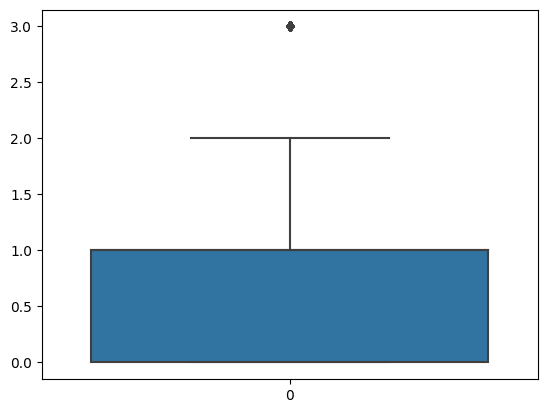

In [ ]:
sns.boxplot(df1.no_of_adults)

<Axes: >

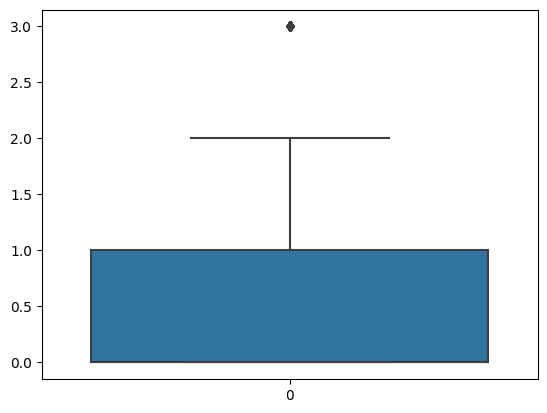

In [ ]:
sns.boxplot(df1.no_of_children)

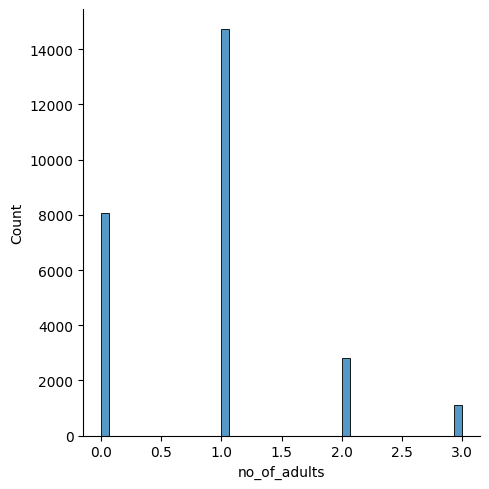

In [ ]:
sns.displot(df1.no_of_adults)

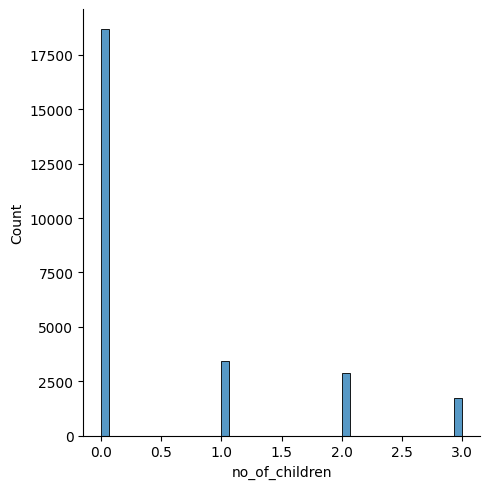

In [ ]:
sns.displot(df1.no_of_children)

In [ ]:
df1.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [ ]:
df1.h1n1_awareness.value_counts()


1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [ ]:
features = pd.DataFrame(features)
col_name = ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']

features.columns = col_name

In [ ]:
X = df1
y = labels

In [ ]:
df1 = SelectKBest(score_func=chi2, k=30)

In [ ]:
fit = df1.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))


    Specs         Score
33     33  21033.000000
10     10   3307.810188
11     11    892.499456
17     17    836.299170
14     14    672.405011
20     20    477.567746
12     12    172.886102
16     16    167.344330
5       5    123.284462
13     13    109.342915
19     19     80.935639
1       1     67.119631
2       2     55.904059
18     18     50.293380
9       9     43.065378
3       3     41.109698
27     27     34.131547
6       6     25.856864
4       4     15.950408
22     22     10.942374
8       8      8.641545
25     25      6.776568
7       7      5.614840
24     24      4.977121
15     15      3.046439


In [ ]:
df1 = features.iloc[:,[9,10,19,16,13,11,21,18,15,0,32,8,12,1,24,5,26,17,6,3,7,2,4]]

[0.00323028 0.00349871 0.00321128 0.00104655 0.00151759 0.00126686
 0.00142584 0.00169106 0.00175056 0.00170305 0.05866849 0.01255174
 0.00221169 0.00156227 0.00837607 0.000827   0.01635311 0.02551717
 0.00323817 0.00507005 0.00945374 0.00261589 0.00315916 0.00276932
 0.00248405 0.00190195 0.0025776  0.00192381 0.00198719 0.00213954
 0.00233092 0.00222552 0.00216264 0.80755112]


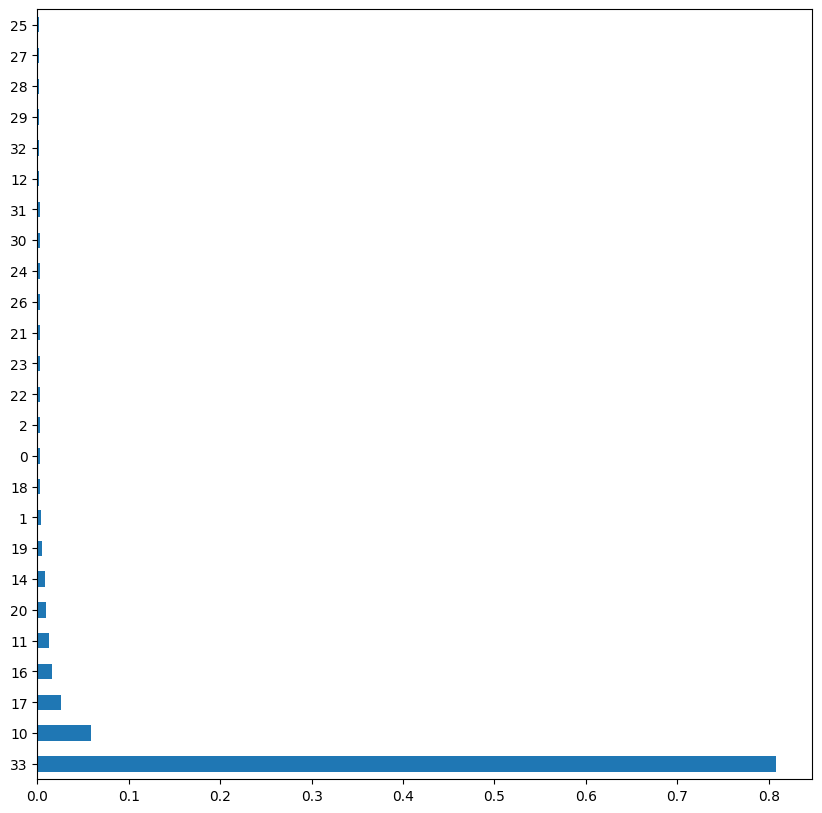

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
df1_tree = features.loc[:,['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']]


In [ ]:
df1.corrwith(labels.h1n1_vaccine)


avoid_touch_face             0.071648
dr_recc_h1n1_vacc            0.393890
is_seas_vacc_effective       0.179272
is_h1n1_vacc_effective       0.269347
cont_child_undr_6_mnths      0.066962
dr_recc_seasonal_vacc        0.209864
sick_from_seas_vacc          0.008360
sick_from_h1n1_vacc          0.075091
has_health_insur             0.121170
unique_id                   -0.003280
no_of_children              -0.003320
reduced_outside_home_cont    0.021768
chronic_medic_condition      0.095207
h1n1_worry                   0.121929
bought_face_mask             0.070498
is_h1n1_risky                0.323265
wash_hands_frequently        0.074712
antiviral_medication         0.040608
avoid_large_gatherings       0.017822
h1n1_awareness               0.117951
contact_avoidance            0.047690
dtype: float64

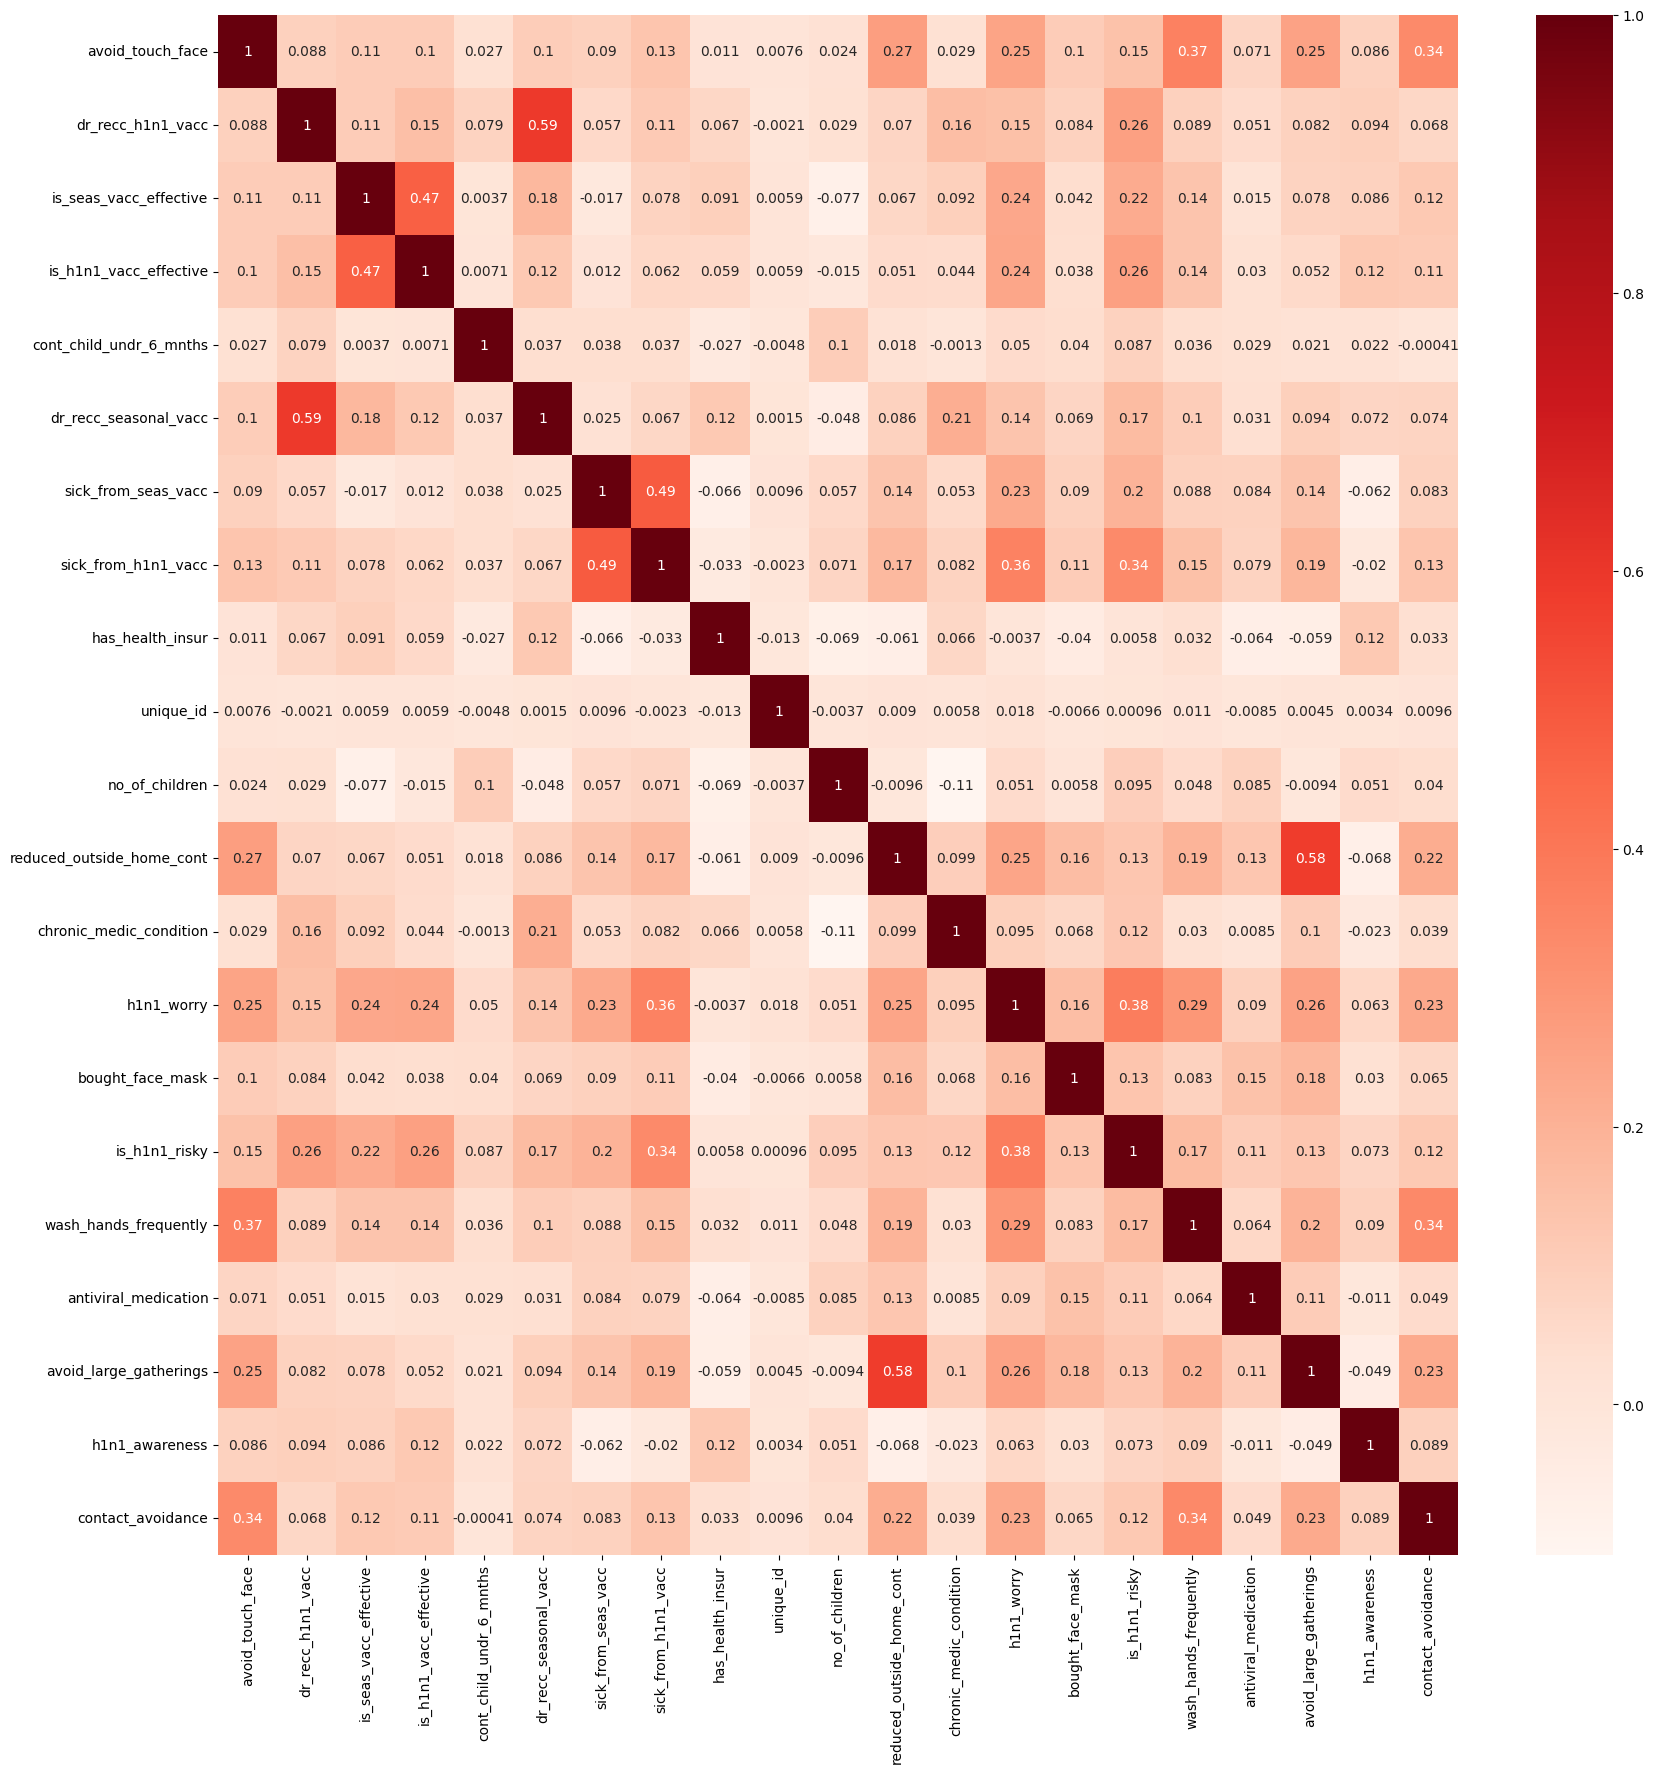

In [ ]:
corrmat = df1.corr()
top_corr_df1 = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(features[top_corr_df1].corr(),annot=True,cmap="Reds")


In [ ]:
X = df1
y = labels
X

,avoid_touch_face,dr_recc_h1n1_vacc,is_seas_vacc_effective,is_h1n1_vacc_effective,cont_child_undr_6_mnths,dr_recc_seasonal_vacc,sick_from_seas_vacc,sick_from_h1n1_vacc,has_health_insur,unique_id,...,h1n1_worry,race,bought_face_mask,income_level,is_h1n1_risky,wash_hands_frequently,antiviral_medication,avoid_large_gatherings,h1n1_awareness,contact_avoidance
0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,2.0,1.0,0,...,1.0,White,0.0,Below Poverty,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,4.0,5.0,0.0,0.0,4.0,4.0,1.0,1,...,3.0,White,0.0,Below Poverty,4.0,1.0,0.0,0.0,2.0,1.0
2,0.0,NaN,4.0,3.0,0.0,NaN,2.0,1.0,NaN,2,...,1.0,White,0.0,"<= $75,000, Above Poverty",1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,5.0,3.0,0.0,1.0,1.0,5.0,NaN,3,...,1.0,White,0.0,Below Poverty,3.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,3.0,3.0,0.0,0.0,4.0,2.0,NaN,4,...,2.0,White,0.0,"<= $75,000, Above Poverty",3.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,NaN,26702,...,2.0,White,0.0,"<= $75,000, Above Poverty",1.0,0.0,0.0,0.0,0.0,1.0
26703,0.0,1.0,5.0,4.0,0.0,1.0,1.0,2.0,1.0,26703,...,1.0,White,0.0,"<= $75,000, Above Poverty",2.0,1.0,0.0,0.0,2.0,1.0
26704,1.0,0.0,5.0,4.0,0.0,0.0,2.0,2.0,NaN,26704,...,2.0,White,1.0,NaN,4.0,1.0,0.0,1.0,2.0,1.0
26705,NaN,0.0,2.0,3.0,0.0,0.0,2.0,2.0,0.0,26705,...,1.0,Hispanic,0.0,"<= $75,000, Above Poverty",1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0
